In [187]:
from power_spectrum import *
%matplotlib inline

In [188]:
def spectral_index(params):
    def f(k):
        if k==0:
            return zeros(len(params))
        return k**(-4*params)
    return f

In [171]:
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline

def interpolate_ps(x):
    d = x.ndim-1
    size = x.shape[-1]
    n = x.shape[0]
    axes=tuple(range(1,d+1))
    factor = size**(d/2)
    ft = lambda x: fft.rfftn(x,axes=axes)/factor
    ift = lambda x: fft.irfftn(x,axes=axes)*factor
    
    ps = abs(ft(x))**2
    ps = ps.reshape((n,-1))
    k = zeros([1]+[size]*(d-1)+[size//2+1])
    build_ps(k,lambda x: array([x]), size, d)
    k = k[0].flatten()
    indices,edges = bin_by_count(k, 1)
    nk = len(indices)
    mps = zeros((n,nk))
    for i,ind in enumerate(indices):
        psi = mean(ps[:,ind],axis=1)
        mps[:,i] = psi
    plot(edges[1:],mps[0])
    counts = [len(i) for i in indices]
    print(counts)
    
    spec_ind, fnl = spectral_index(p[:,0]), 10.**(6*p[:,1]-3).reshape([-1]+[1]*d)
    ps = zeros([p.shape[0]]+[size]*(d-1)+[size//2+1])
    build_ps(ps, spec_ind, size, d)
    k4 = zeros([p.shape[0]]+[size]*(d-1)+[size//2+1])
    build_ps(k4, lambda x: x**4*ones(1), size, d)
    
    ps = ps/k4
    ps[tuple([slice(None)]+[0]*d)]=0
    ps = ift(ps)
    ps += fnl**2*ps**2/16
    ps = ft(ps)*k4
    return real(ps)

In [6]:
nsims_train = 10**5
nsims_test = 10**3

p_train = rand(nsims_train,2)
p_test = rand(nsims_test, 2)
#p_test[:,1] = 0.6
#p_test[:,1]= rand(nsims_test)*0.3+0.7

#sims = lambda p: standardise_ps(fast_gaussian(spectral_index(p[:,0]), fnl=10.**(6*p[:,1]-3)), lambda x: 1, ps=True, originals=theo_ps(p).reshape((len(p),-1)))
sims = lambda p: fast_gaussian(spectral_index(p[:,0]), fnl=10.**(6*p[:,1]-3))

In [8]:
x_test = sims(p_test)

/global/u2/a/avirukt/proj/power_spectrum.py:159: RuntimeWarning: invalid value encountered in true_divide
  field /= k2


[3, 2, 3, 4, 2, 3, 4, 4, 3, 4, 2, 4, 7, 4, 4, 2, 4, 3, 4, 4, 4, 4, 3, 6, 4, 4, 4, 4, 3, 8, 4, 2, 4, 4, 4, 3, 4, 8, 4, 4, 4, 2, 7, 4, 4, 4, 4, 4, 4, 4, 3, 4, 8, 2, 8, 4, 4, 3, 8, 4, 4, 4, 4, 4, 4, 2, 4, 7, 8, 4, 4, 4, 4, 8, 4, 4, 3, 4, 6, 4, 8, 4, 4, 4, 8, 7, 4, 4, 4, 4, 4, 4, 2, 4, 4, 8, 2, 3, 7, 4, 7, 4, 3, 4, 4, 3, 2, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 3, 2, 4, 4, 3, 4, 4, 3, 2, 4, 3, 4, 3, 2, 3, 3, 1]


NameError: name 'p' is not defined

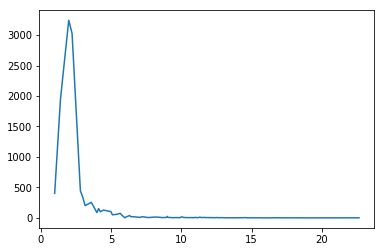

In [25]:
interpolate_ps(x_test[:2])

In [147]:
x = x_test
d = x.ndim-1
size = x.shape[-1]
n = x.shape[0]
axes=tuple(range(1,d+1))
factor = size**(d/2)
ft = lambda x: fft.rfftn(x,axes=axes)/factor
ift = lambda x: fft.irfftn(x,axes=axes)*factor

ps = abs(ft(x))**2
ps = ps.reshape((n,-1))
k = zeros([1]+[size]*(d-1)+[size//2+1])
build_ps(k,lambda x: array([x]), size, d)
k = k[0].flatten()
indices,edges = bin_by_count(k, 1)
nk = len(indices)
mps = zeros((n,nk))
for i,ind in enumerate(indices):
    psi = mean(ps[:,ind],axis=1)
    mps[:,i] = psi
mesh = linspace(1,16*2**.5,1000)
weights = 1/mps

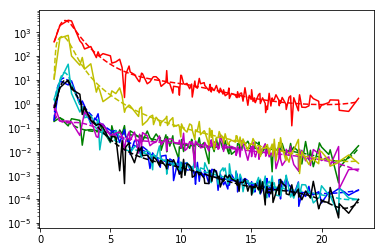

In [182]:
c="rgbcmyk"
for i in range(len(c)):
    plot(edges[1:],mps[i],c[i]) 
    interp = LSQUnivariateSpline(edges[1:],log(mps[i]),array([1.25,2.5,5,10,15,20]))#, w=1/mps[i]**.5)
    plot(mesh, exp(interp(mesh)), c[i]+"--")
yscale("log")

In [184]:
knots = array([1.25,2.5,5,10,15,20])/16/2**.5*size/2*d**.5

In [186]:
LSQUnivariateSpline(edges[1:],log(mps),knots)

ValueError: too many axes: 2 (effrank=2), expected rank=1


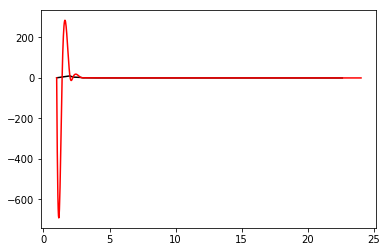

In [94]:
plot(edges[1:],mps[6],"k") 
plot(mesh, interp(mesh), "r")